In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Shape of datasets
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [5]:
# Unique classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 10


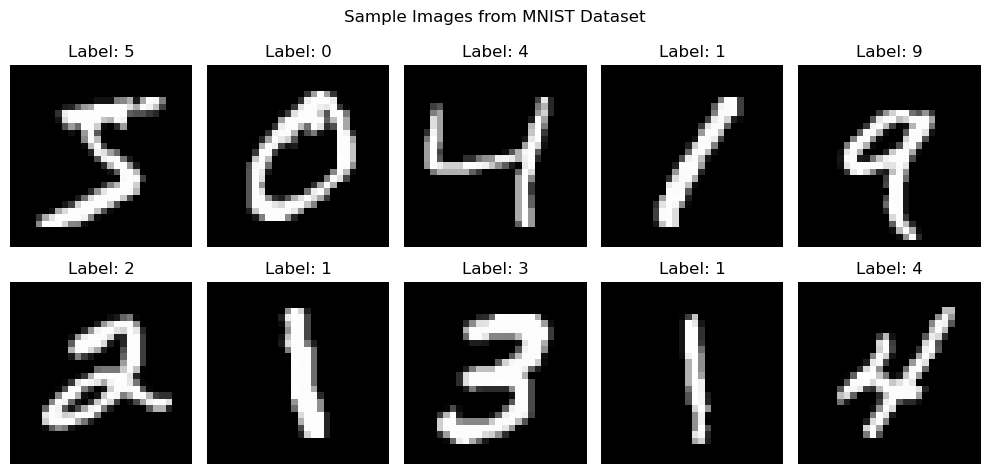

In [7]:
# Sample visualization
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Dataset")
plt.tight_layout()
plt.show()

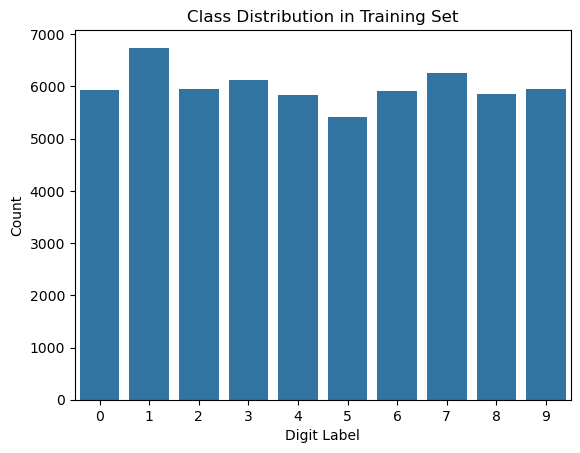

In [10]:
# Class distribution
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

In [13]:
# Define a CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Conv Layer 1
    keras.layers.MaxPooling2D((2, 2)),  # Pooling Layer 1

    keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Conv Layer 2
    keras.layers.MaxPooling2D((2, 2)),  # Pooling Layer 2

    keras.layers.Flatten(),  # Flatten Feature Maps
    keras.layers.Dense(128, activation='relu'),  # Fully Connected Layer
    keras.layers.Dense(10, activation='softmax')  # Output Layer (10 classes)
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9091 - loss: 0.2879 - val_accuracy: 0.9861 - val_loss: 0.0398
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9861 - loss: 0.0450 - val_accuracy: 0.9857 - val_loss: 0.0434
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9905 - loss: 0.0294 - val_accuracy: 0.9870 - val_loss: 0.0441
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9934 - loss: 0.0189 - val_accuracy: 0.9921 - val_loss: 0.0270
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9957 - loss: 0.0143 - val_accuracy: 0.9912 - val_loss: 0.0278


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9887 - loss: 0.0346
Test Accuracy: 0.9912
Test Loss: 0.0278


In [21]:
from sklearn.metrics import classification_report
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


print(classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



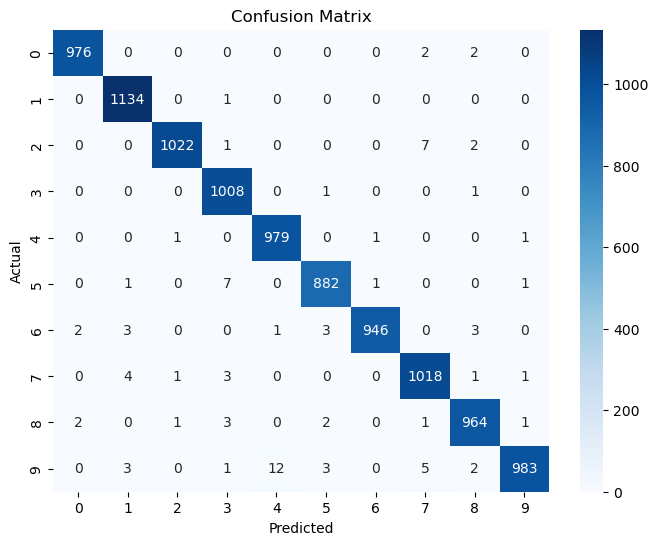

In [22]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [23]:
# Save the model
model.save('D:\Guvi_Project\Personalized Learning Assistant\models\llm_models\cnn_model.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


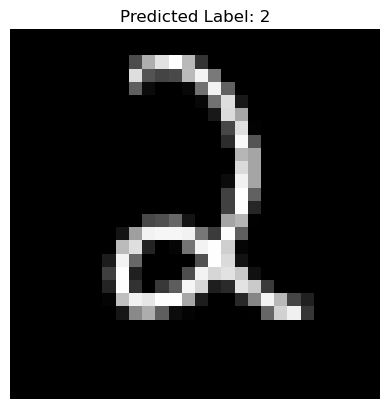

In [24]:
predictions = model.predict(x_test)

# Show the first test image and its predicted label
plt.imshow(x_test[47].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[47])}")
plt.axis('off')
plt.show()